In [9]:
!pip install tqdm
!pip install tabulate
#!pip install tensorflow
#!pip install ipywidgets
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

Hello... Good morning!
use_gpu = 0
import numpy as np
Importing python packages was done.
time = 500648259016
Zernike functions are defined.
Current Time = 21:09:51
CPU times: user 2.09 s, sys: 1.32 s, total: 3.41 s
Wall time: 743 ms


2021-12-04:21:09:54, WARNING  [font_manager.py:1350] findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
2021-12-04:21:09:54, WARNING  [font_manager.py:1350] findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Plots of Radial Poolynomial
Current Time = 21:09:54


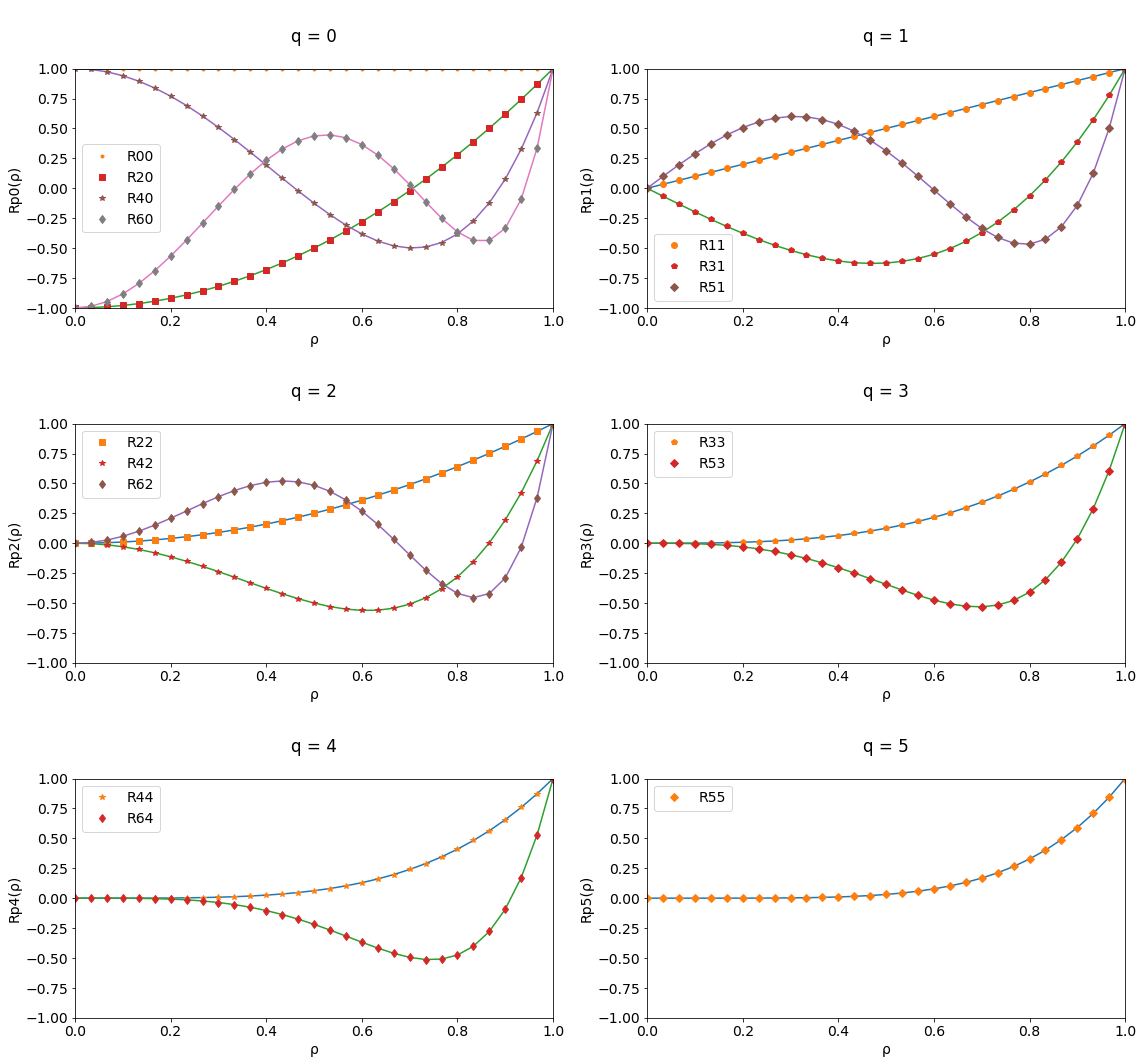

Done.
CPU times: user 1.21 s, sys: 108 ms, total: 1.32 s
Wall time: 1.03 s


In [2]:
%%time
clear_output()

print( "Plots of Radial Poolynomial" )
print_curr_time()

debug = 0

datas = []

datas.append( { "order" : (0, 0), "coeffs" : [1] })
datas.append( { "order" : (1, 1), "coeffs" : [1] })
datas.append( { "order" : (2, 0), "coeffs" : [2, -1] })
datas.append( { "order" : (2, 2), "coeffs" : [1] })

datas.append( { "order" : (3, 1), "coeffs" : [3, -2] })
datas.append( { "order" : (3, 3), "coeffs" : [1] })

datas.append( { "order" : (4, 0), "coeffs" : [6, -6, 1] })
datas.append( { "order" : (4, 2), "coeffs" : [4, -3] })
datas.append( { "order" : (4, 4), "coeffs" : [1] })

datas.append( { "order" : (5, 1), "coeffs" : [10, -12, 3] })
datas.append( { "order" : (5, 3), "coeffs" : [5, -4] })
datas.append( { "order" : (5, 5), "coeffs" : [1] })

datas.append( { "order" : (6, 0), "coeffs" : [20, -30, 12, -1] })
datas.append( { "order" : (6, 2), "coeffs" : [15, -20, 6] })
datas.append( { "order" : (6, 4), "coeffs" : [6, -5] })
#datas.append( { "order" : (6, 6), "coeffs" : [1] })

#plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"
row_cnt = 3; col_cnt = 2
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.05*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [ charts ]

step = 1/30
rho = np.arange( 0, 1 + step, step )
rho = rho[ np.where( rho <= 1 ) ]

markers = [ ".", "o", "s", "p", "*", "D", "d" ]

hash = {}

for data in datas : 
    order  = data[ "order" ]
    coeffs = data[ "coeffs" ]
    p = order[0] ; q = order[1]
    r_pl_numeric = Rpq( p, q, rho, hash=hash, debug=debug )
    
    r_pl_analytic = np.zeros_like( rho )
    for idx, coeff in enumerate( coeffs ) : 
        r_pl_analytic += coeff*np.power( rho, p - 2*idx )
    pass 

    chart = charts[q]
    chart.plot( rho, r_pl_analytic, linestyle="solid" )
    chart.plot( rho, r_pl_numeric, markers[p], label=f"R{p}{q}" )
    chart.set_xlim(  0, 1 )
    chart.set_ylim( -1, 1 )
    chart.set_xlabel( "ρ" )
    chart.set_ylabel( f"Rp{q}(ρ)" )
    chart.set_title( f"\nq = {q}\n" )
    chart.legend()
    #chart.legend(loc='upper left', bbox_to_anchor=(0.5, 0.1), fancybox=True, shadow=0, ncol=len(datas)//2)
pass

plt.tight_layout(); plt.show()
#print( f"rho = {rho}" )

print( "Done.")

Current Time = 21:10:09
Radial polynomail orthogonality validation


Resolution:   0%|          | 0/6 [00:00<?, ?it/s]


************************************************************
Resolution = 2, T = 6
Elapsed time = 0.00908214699995824
Error avg. = 0.0489777724
Fail count = 72, Good count = 0

************************************************************
Resolution = 3, T = 6
Elapsed time = 0.018081526999935704
Error avg. = 0.0047397869
Fail count = 72, Good count = 0

************************************************************
Resolution = 4, T = 6
Elapsed time = 0.017974314999946728
Error avg. = 0.0004723979
Fail count = 0, Good count = 72

************************************************************
Resolution = 5, T = 6
Elapsed time = 0.10835425300001589
Error avg. = 0.0000472240
Fail count = 0, Good count = 72

************************************************************
Resolution = 6, T = 6
Elapsed time = 1.2044980830000895
Error avg. = 0.0000047222
Fail count = 0, Good count = 72

************************************************************
Resolution = 7, T = 6
Elapsed time = 19.743927242000

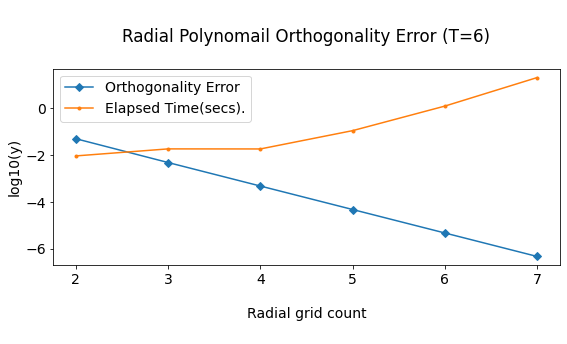

Current Time = 21:10:31

Done
CPU times: user 12.3 s, sys: 9.09 s, total: 21.4 s
Wall time: 21.3 s


In [3]:
%%time
clear_output()

print_curr_time()

print( "Radial polynomail orthogonality validation" )

np.set_printoptions(suppress=1)

debug = 1

error_avgs = []
elapsed_list = []

resolutions = [ x for x in range( 2, 7 + 1 ) ]

T = 6 #10 # 20 

for resolution in tqdm( resolutions, desc="Resolution" ):
    if debug : 
        print( line2 )
        print( f"Resolution = {resolution}, T = {T}" )
    pass
    
    then = perf_counter() 

    dr = 1/(10**resolution)

    rho = np.arange( 0, 1 + dr, dr ) 
    rho = rho[ np.where( rho <= 1 ) ]

    # debug and print( f"rho = {rho}" )

    good_cnt = 0 
    fail_cnt = 0 

    error_sum = 0
    
    hash= {}

    for p in range( 0, T + 1 ) :
        for q in range( 0, T + 1 ) :
            for l in range( -q, q + 1 ) :
                if abs(l) > p or abs(l) > q:
                    continue ;
                elif ( p - abs(l) )%2 == 1 :
                    continue
                elif ( q - abs(l) )%2 == 1 :
                    continue
                pass
            
                r_pl = Rpq( p, l, rho, hash=hash, debug=0 )
                r_ql = Rpq( q, l, rho, hash=hash, debug=0 )
                
                sum = 0 
                sum = np.sum(r_pl*r_ql*rho*dr)*2*(p + 1)
                
                expect = [0, 1][ p == q ]
                error = abs(expect -sum)
                error_sum += error
                success = error < 1/1_000 
                success_t = 'Good' if success else 'Fail'
                
                good_cnt += success
                fail_cnt += (not success)
                
                #debug and print( f"[{p:02d}][{q:02d}] {success_t} : Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}, exptect = {expect}", flush="True" )
            pass
        pass
    pass

    del hash

    error_avg = error_sum/(good_cnt + fail_cnt)
    error_avgs.append( error_avg )
    
    elapsed = perf_counter() - then
    elapsed_list.append( elapsed )

    if debug : 
        print( f"Elapsed time = { elapsed }" )
        print( f"Error avg. = {error_avg:.10f}" )
        print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
    pass
pass

print( "Plotting .... ", flush="True" )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

resolutions = np.array( resolutions, np.uint8 )
error_avgs = np.log10( np.array( error_avgs ) )
elapsed_list = np.array( elapsed_list )
elapsed_list = np.log10( elapsed_list )

chart.plot( resolutions, error_avgs, marker="D", label="Orthogonality Error" )
chart.plot( resolutions, elapsed_list, marker=".", label="Elapsed Time(secs)." )

chart.set_title( f"\nRadial Polynomail Orthogonality Error (T={T})\n" )
chart.set_xlabel( "\nRadial grid count\n" )
chart.set_ylabel( "log10(y)" )
chart.set_xticks( resolutions ) 
chart.legend()

plt.tight_layout(); plt.show()

print_curr_time()

print( "\nDone")

In [6]:
%%time
from IPython.display import clear_output
# 저니크 다항식 테스트 
clear_output()

from AZernike import *

print_curr_time()

print( "\nZernike polynomail orthogonality validation" )

np.set_printoptions(suppress=1)

debug = 1

error_avgs = []
elapsed_list = []

res_max = 5 #7
resolutions = [ x for x in range( 4, res_max + 1 ) ]

T = 5 #5 #10 # 20 

for resolution in tqdm( resolutions, desc="Resolution" ):
    if debug : 
        print( line2 )
        print( f"Resolution = {resolution}K, T = {T}" )
    pass
    
    then = perf_counter() 

    h = 10**resolution
    w = h 
    img = np.ones( (h, w), np.uint8 )
    
    rho, theta, x, y, dx, dy = rho_theta( img )

    good_cnt = 0 
    fail_cnt = 0 

    error_sum = 0
    
    hash= {}

    for p1 in range( 0, T + 1 ) :
        for q1 in range( -p1, p1 + 1 ) :
            if ( p1 - abs(q1) )%2 == 1 :
                continue
            pass
        
            for p2 in range( 0, T +1 ) :
                for q2 in range( -p2, p2 + 1 ) : 
                    if ( p2 - abs(q2) )%2 == 1 :
                        continue
                    pass

                    v_pl = Vpq( p1, q1, rho, theta, hash=hash, debug=0)
                    v_ql = Vpq( p2, q2, rho, theta, hash=hash, debug=0)

                    sum = np.sum( np.conjugate(v_pl)*v_ql )
                    sum = sum*dx*dy*(p+1)/pi
                    sum = np.absolute( sum )

                    #print( f"R = {resolution}, T = {T}, v_pl({p}, {l:3d}) = {v_pl}, v_ql({q}, {l:3d}) = {v_ql}, ", flush=1 )

                    expect = [0, 1][ p == q ]
                    error = abs(expect -sum)
                    error_sum += error
                    success = error < 1/1_000 
                    success_t = 'Good' if success else 'Fail'

                    good_cnt += success
                    fail_cnt += (not success)

                    debug and print( f"[{p:02d}][{q:02d}] {success_t} : V*pl({p1}, {q1:2d})*Vql({p2}, {q2:2d}) = {sum:.4f}, exptect = {expect}, error={error:.4f}", flush=1 )
                pass
            pass
        pass
    pass

    del hash

    error_avg = error_sum/(good_cnt + fail_cnt)
    error_avgs.append( error_avg )
    
    elapsed = perf_counter() - then
    elapsed_list.append( elapsed )

    if debug : 
        print()
        print( f"Elapsed time = { elapsed }" )
        print( f"Error avg. = {error_avg:.10f}" )
        print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
    pass
pass

print( "Plotting .... ", flush="True" )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

resolutions = np.array( resolutions, np.uint8 )
error_avgs = np.log10( np.array( error_avgs ) )
elapsed_list = np.array( elapsed_list )
elapsed_list = np.log10( elapsed_list )

chart.plot( resolutions, error_avgs, marker="D", label="Orthogonality Error" )
chart.plot( resolutions, elapsed_list, marker=".", label="Elapsed Time(secs)" )

chart.set_title( f"\nZerinike Polynomail Orthogonality Error (T={T})\n" )
chart.set_xlabel( "\nRadial grid count\n" )
chart.set_ylabel( "log10(y)" )
chart.set_xticks( resolutions ) 
chart.legend()

plt.tight_layout(); plt.show()

print( "\nDone")

print_curr_time()

Current Time = 22:09:29

Zernike polynomail orthogonality validation


Resolution:   0%|          | 0/2 [00:00<?, ?it/s]


************************************************************
Resolution = 4K, T = 5
[05][05] Fail : V*pl(0,  0)*Vql(0,  0) = 6.0000, exptect = 1, error=5.0000
Invalid argument, p(1) - q(0) should be an even number.


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Current Time = 21:59:03
img shape=  (4, 4)
x = [-0.062 -0.06  -0.058 ...  0.058  0.06   0.062]
y = [-0.998 -0.998 -0.998 ...  0.998  0.998  0.998]
rho = [0.999962   0.99990099 0.99984196 ... 0.99984196 0.99990099 0.999962  ]
itemsize = 8
dx = 0.002, dy = 0.002
K = 1000, T = 3
V*_pq x V_pq( 0,   0) =  0.9999068454691418
V*_pq x V_pq( 1,  -1) =  1.3331470633987228
V*_pq x V_pq( 1,   1) =  1.3331470633987228
V*_pq x V_pq( 2,  -2) =  1.4997206573042852
V*_pq x V_pq( 2,   0) =  0.9997207852322328
V*_pq x V_pq( 2,   2) =  1.4997206573042852
V*_pq x V_pq( 3,  -3) =  1.599627623708991
V*_pq x V_pq( 3,  -1) =  1.0662946037021332
V*_pq x V_pq( 3,   1) =  1.0662946037021332
V*_pq x V_pq( 3,   3) =  1.599627623708991


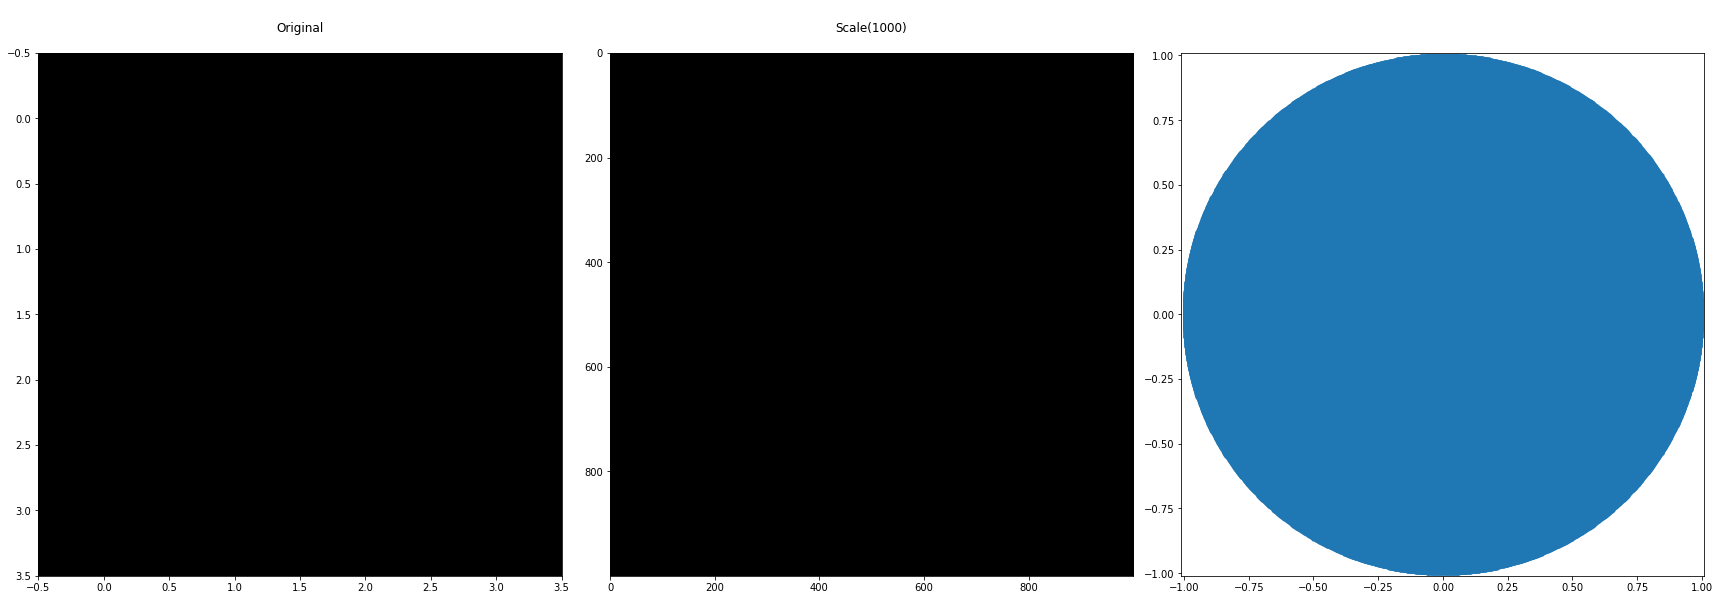

2021-12-04:21:59:05, INFO     [Profiler.py:0085] *** The function[ rho_theta ] Average: 0.056 sec(s), Max: 0.062 sec(s), Call : 3 times. 
2021-12-04:21:59:05, INFO     [Profiler.py:0085] *** The function[       Vpq ] Average: 0.037 sec(s), Max: 0.065 sec(s), Call : 42 times. 
2021-12-04:21:59:05, INFO     [Profiler.py:0085] *** The function[       Rpq ] Average: 0.008 sec(s), Max: 0.022 sec(s), Call : 30 times. 


Current Time = 21:59:05

Done.
CPU times: user 1.64 s, sys: 101 ms, total: 1.74 s
Wall time: 1.47 s


In [3]:
%%time
from IPython.display import clear_output
# 저니크 모멘트
clear_output()

from AZernike import *

print_curr_time()

debug = 0

img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 25

if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

if 1 : 
    img = np.ones( (4, 4), np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

K = 1_000
img = cv.resize( img_org, (K, K), interpolation=cv.INTER_AREA )

img = np.array( img )

rho, theta, x, y, dx, dy = rho_theta( img, debug = debug) 

print( f"x = {x}" )
print( f"y = {y}" )
print( f"rho = {rho}" )
print( f"itemsize = {x.itemsize}" )
print( f"dx = {dx}, dy = {dy}" )

T = 3
print( f"K = {K}, T = {T}" )
hash = {}
for p in range( 0, T + 1 ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( p, q, rho, theta, hash=hash, debug=0 )
            sum = np.sum( v_pq*np.conjugate(v_pq) ) 
            sum = sum*dx*dy*(p + 1)/pi 
            sum = np.absolute( sum )
            print( f"V*_pq x V_pq({p:2d}, {q:3d}) = ", sum )
        pass
    pass
pass

del hash

# 서브 챠트 생성 
idx = 0 
row_cnt = 1; col_cnt = 3
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 8*row_cnt) )
charts = charts.flatten()

t_img = img_org
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( t_img, cmap='gray' )
if 0 : 
    chart.set_xlim( 0 , t_img.shape[1] - 1 )
    chart.set_ylim( 0 , t_img.shape[0] - 1 ) 
    chart.set_yticks( np.arange( 0, t_img.shape[1]))
    chart.set_yticks( np.arange( 0, t_img.shape[0])[::-1])

t_img = img
chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({K})\n" )
chart.imshow( t_img, cmap='gray' )
if 0 : 
    chart.set_xlim( 0 , t_img.shape[1] - 1 )
    chart.set_ylim( 0 , t_img.shape[0] - 1)
    chart.set_yticks( np.arange( 0, t_img.shape[1]))
    chart.set_yticks( np.arange( 0, t_img.shape[0])[::-1])

chart = charts[ idx ] ; idx += 1
chart.set_aspect(1)
m = 0.01
chart.set_xlim( -1 - m , 1 + m )
chart.set_ylim( -1 - m , 1 + m )
if 0 : 
    chart.axhline(y=0, color='k')
    chart.axvline(x=0, color='k')

chart.add_artist( plt.Circle((0, 0), 1, fill=0) )
chart.scatter( x, y, marker="." )

plt.tight_layout(); plt.show()

print_profile()

print_curr_time()

print( "\nDone." )